# Objective: Classify Yelp photo data into five categories using Inception V3 in Keras

In [1]:
''' Classify Yelp photo data into five categories using Inception V3 in Keras developed by Priyanka Singhal
    credits: https://keras.io/applications/#fine-tune-inceptionv3-on-a-new-set-of-classes
'''
# import libraries
import tensorflow as tf
import pandas as pd
import os

In [2]:
# Install Keras
!pip install -q keras

## Prerequisites -
### Ensure that you download the yelp photo dataset locally using this link: 
    https://www.yelp.com/dataset/download
### Please proceed to the next step only once you have the folder structure like this:
    > yelp_photos
        > photo.json
        > photos 
### Total number of images should be 200000

In [ ]:
# Set working directory default path <to be changed based on local dir path>
dir_path = "/Users/priyankasinghal/Desktop/Present_courses/MachineLearning/Project_Documents/yelp_photos"
os.chdir(dir_path)

# Set test and Training directory folder
TRAIN_DIR = 'photos/train'
TEST_DIR = 'photos/test'

# Step 1: Data Preprocessing and Analysis - Data Preprocessing part 1/2

## Step 1.1: Load the yelp image dataset

In [4]:
yelp_photo_df = pd.read_json ('photo.json', lines=True)
yelp_photo_df.head(3)

,business_id,caption,label,photo_id
0,rcaPajgKOJC2vo_l3xa42A,,inside,MllA1nNpcp1kDteVg6OGUw
1,Kn23LDd740SBVJ7mum0fwg,,inside,YjxBE88Bf6CmTEF2LP1UNA
2,ZkGDCVKSdf8m76cnnalL-A,,food,1f7izSjM0WjkDRIVbPy1yw


In [5]:
# Print the categories/labels for the photo classifier
yelp_photo_df.label.unique()

array(['inside', 'food', 'outside', 'drink', 'menu'], dtype=object)

## Step 1.2: Train data preparation
    Step 1.2.1: Create empty folder structure like this : 
        train 
            > inside 
            > food
            > outside
            > drink
            > menu
    Step 1.2.2: Categorize images into different folders under train directory for eg: inside, outside, menu, food, drink
    Step 1.2.3: Print the count of files in each folder

In [6]:
# Move inside photos to inside folder
import shutil

def data_preparation_folder_creation(methodtype):  
    if methodtype == 'test':
        source_dir = TEST_DIR
    else:
        source_dir = TRAIN_DIR
        
    if not os.path.isdir(source_dir):
        path = os.path.join(source_dir) 
        os.mkdir(path, mode=0o777) 
        if not os.path.isdir(source_dir+"/inside"): 
            path = source_dir+ "/inside"
            os.mkdir(path, mode=0o777) 
        if not os.path.isdir(source_dir+"/outside"): 
            path = source_dir+ "/outside"
            os.mkdir(path, mode=0o777) 
        if not os.path.isdir(source_dir+"/drink"): 
            path = source_dir+"/drink"
            os.mkdir(path, mode=0o777) 
        if not os.path.isdir(source_dir+"/food"): 
            path = source_dir+"/food"
            os.mkdir(path, mode=0o777) 
        if not os.path.isdir(source_dir+"/menu"):
            path = source_dir+ "/menu"
            os.mkdir(path, mode=0o777) 

        os.listdir(source_dir)

def categorize_images_into_train_folder(image_from_dir, image_to_dir):
    # Utility to copy images into respective folders

    for index, row in yelp_photo_df.iterrows():
        source_image_path = image_from_dir+'/'+row['photo_id']+'.jpg'
        if row['label'] == 'inside':
                shutil.copyfile( source_image_path, image_to_dir+'/inside/'+row['photo_id']+'.jpg')
        elif row['label'] == 'outside':  
                shutil.copyfile(source_image_path, image_to_dir+'/outside/'+row['photo_id']+'.jpg')
        elif row['label'] == 'food':
                shutil.copyfile(source_image_path, image_to_dir+'/food/'+row['photo_id']+'.jpg')
        elif row['label'] == 'drink':
                shutil.copyfile(source_image_path, image_to_dir+'/drink/'+row['photo_id']+'.jpg')
        elif row['label'] == 'menu':
                shutil.copyfile(source_image_path, image_to_dir+'/menu/'+row['photo_id']+'.jpg')
        else:
            print("na")

            
def print_count_of_files():
    print('photos/train/inside')
    !ls photos/train/inside | wc -l
    print('photos/train/outside')
    !ls photos/train/outside | wc -l
    print('photos/train/food')
    !ls photos/train/food | wc -l
    print('photos/train/drink')
    !ls photos/train/drink | wc -l
    print('photos/train/menu')
    !ls photos/train/menu | wc -l
    
    print('photos/test/inside')
    !ls photos/test/inside | wc -l
    print('photos/test/outside')
    !ls photos/test/outside | wc -l
    print('photos/test/food')
    !ls photos/test/food | wc -l
    print('photos/test/drink')
    !ls photos/test/drink | wc -l
    print('photos/test/menu')
    !ls photos/test/menu | wc -l

def prepare_train_data():
    if not os.path.isdir(TRAIN_DIR): 
        # Step 1: Create empty folder structure like this : 
        # train 
        #    > inside 
        #    > food
        #    > outside
        #    > drink
        #    > menu
        data_preparation_folder_creation('train')
        image_from_dir = "photos"
        image_to_dir = TRAIN_DIR
        # Step 2: Categorise images into different folders under train directory for eg: inside, outside, menu, food, drink :
        categorize_images_into_train_folder(image_from_dir, image_to_dir)
        # Step 3: Print the count of files in each folder :
    print_count_of_files()

In [7]:
# prepare Train data
prepare_train_data()

photos/train/inside
   41958
photos/train/outside
    9227
photos/train/food
   91899
photos/train/drink
   14496
photos/train/menu
    2418
photos/test/inside
   10490
photos/test/outside
    2307
photos/test/food
   22975
photos/test/drink
    3625
photos/test/menu
     605


# Step 2: Split data into training and testing set - 80:20

In [8]:
from glob import glob
from sklearn.model_selection import train_test_split

# Split train and test data into 80:20
inside_set = glob(TRAIN_DIR+'/inside/*.jpg')
outside_set = glob(TRAIN_DIR+'/outside/*.jpg')
food_set = glob(TRAIN_DIR+'/food/*.jpg')
drink_set = glob(TRAIN_DIR+'/drink/*.jpg')
menu_set = glob(TRAIN_DIR+'/menu/*.jpg')

inside_train, inside_test = train_test_split(inside_set, test_size=0.20)
outside_train, outside_test = train_test_split(outside_set, test_size=0.20)
food_train, food_test = train_test_split(food_set, test_size=0.20)
drink_train, drink_test = train_test_split(drink_set, test_size=0.20)
menu_train, menu_test = train_test_split(menu_set, test_size=0.20)

## Step 2.1: Test data preparation
    Step 2.1.1: Create empty folder structure like this : 
        test 
            > inside 
            > food
            > outside
            > drink
            > menu
    Step 2.1.2: Categorize images into different folders under test directory for eg: inside, outside, menu, food, drink
    Step 2.1.3: Print the count of files in each folder

In [9]:
# Create Train and Test directory
def categorize_images_into_test_folder(image_from_dir, image_to_dir):
    # Utility to move images into test folder
    inside_source_folder= image_from_dir+'/inside/*.jpg'
    inside_dest_folder= image_to_dir+'/inside'
    outside_source_folder= image_from_dir+'/outside/*.jpg'
    outside_dest_folder= image_to_dir+'/outside'
    drink_source_folder= image_from_dir+'/drink/*.jpg'
    drink_dest_folder= image_to_dir+'/drink'
    menu_source_folder= image_from_dir+'/menu/*.jpg'
    menu_dest_folder= image_to_dir+'/menu'
    food_source_folder= image_from_dir+'/food/*.jpg'
    food_dest_folder= image_to_dir+'/food'
    
    # Move a file from the directory source (train) to dest (test)
    for file in glob(inside_source_folder):
        if file in inside_test:
            shutil.move(file, inside_dest_folder)
    for file in glob(outside_source_folder):
        if file in outside_test:
            shutil.move(file, outside_dest_folder)
    for file in glob(drink_source_folder):
        if file in drink_test:
            shutil.move(file, drink_dest_folder)
    for file in glob(menu_source_folder):
        if file in menu_test:
            shutil.move(file, menu_dest_folder)
    for file in glob(food_source_folder):
        if file in food_test:
            shutil.move(file, food_dest_folder)
    
def prepare_test_data():
    if not os.path.isdir(TEST_DIR): 
        # Step 1: Create empty folder structure like this : 
        # test 
        #    > inside 
        #    > food
        #    > outside
        #    > drink
        #    > menu
        data_preparation_folder_creation('test')
        image_from_dir = "photos/train"
        image_to_dir = "photos/test"
        # Step 2: Categorize images into different folders under test directory for eg: inside, outside, menu, food, drink :
        categorize_images_into_test_folder(image_from_dir, image_to_dir)
        # Step 3: Print the count of files in each folder :
    print_count_of_files()

In [10]:
# prepare Test data after splitting into 80:20 train and test ratio
prepare_test_data()

photos/train/inside
   41958
photos/train/outside
    9227
photos/train/food
   91899
photos/train/drink
   14496
photos/train/menu
    2418
photos/test/inside
   10490
photos/test/outside
    2307
photos/test/food
   22975
photos/test/drink
    3625
photos/test/menu
     605


## Plot random training images for visualization purposes

In [11]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Plot the images
def show_training_images():
    inside = np.random.choice(inside_train, 5)
    outside = np.random.choice(outside_train, 5)
    menu = np.random.choice(menu_train, 5)
    food = np.random.choice(food_train, 5)
    drink = np.random.choice(drink_train, 5)
    
    data = np.concatenate((inside, outside, menu, food, drink))
    labels = 5 * ['Inside'] + 5 *['Outside'] + 5 *['Menu'] + 5 *['Food'] + 5 *['Drink']

    N, R, C = 25, 5, 5
    plt.figure(figsize=(12, 9))
    for k, (src, label) in enumerate(zip(data, labels)):
        im = Image.open(src).convert('RGB')
        plt.subplot(R, C, k+1)
        plt.title(label)
        plt.imshow(np.asarray(im))
        plt.axis('off')

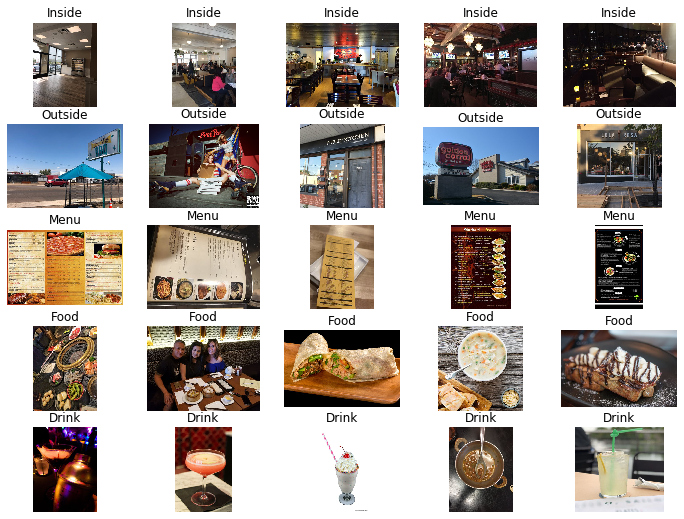

In [12]:
show_training_images()

# Step 3: Prepare Images for Inception V3 model - Data Preprocessing part 2/2

In [25]:
# Reduce images into 299 x 299

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3, preprocess_input
WIDTH = 299
HEIGHT = 299
BATCH_SIZE = 32
EPOCHS = 5
STEPS_PER_EPOCH = 320
VALIDATION_STEPS = 64

def preprocess_image_data_for_inception_v3():

    data_train = ImageDataGenerator(
        preprocessing_function=preprocess_input,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

    data_validation = ImageDataGenerator(
        preprocessing_function=preprocess_input,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

    train_generator = data_train.flow_from_directory(
        TRAIN_DIR,
        target_size=(HEIGHT, WIDTH),
            batch_size=BATCH_SIZE,
            class_mode='categorical')

    validation_generator = data_validation.flow_from_directory(
        TEST_DIR,
        target_size=(HEIGHT, WIDTH),
        batch_size=BATCH_SIZE,
        class_mode='categorical')
    
    return train_generator, validation_generator

In [26]:
train_generator, validation_generator = preprocess_image_data_for_inception_v3()

Found 159998 images belonging to 5 classes.
Found 40002 images belonging to 5 classes.


# Step 4: Build and tune Inception V3 model

In [27]:
''' Reference : https://keras.io/applications/#build-inceptionv3-over-a-custom-input-tensor '''
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout

CLASSES = 5

# Build inception v3 model
# def build_inception_v3_model():

# Step 1: Create imagenet pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

# Step 2: Add an average pooling layer
x = base_model.output
x = GlobalAveragePooling2D(name='avg_pool')(x)
x = Dropout(0.4)(x)

# Step 3: Add a logistic layer - 5 classes for 5 labels: drink, outside, inside, food, menu
predictions = Dense(CLASSES, activation='softmax')(x)

# Step 4: Create the model for training
model = Model(inputs=base_model.input, outputs=predictions)

# Step 5: Transfer learning. Freeze the convolutional layers. We will only train the top layers
for layer in base_model.layers:
    layer.trainable = False

# Step 6: Compile the model. Our loss function is based on cross entropy
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Fit the model and save it

In [28]:
MODEL_FILE = 'inception_v3_trained.model'

history = model.fit_generator(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=validation_generator,
    validation_steps=VALIDATION_STEPS)
  
model.save(MODEL_FILE)

Epoch 1/5
320/320 [==============================] - 1418s 4s/step - loss: 0.4600 - accuracy: 0.8379 - val_loss: 0.2995 - val_accuracy: 0.8929
Epoch 2/5
320/320 [==============================] - 1461s 5s/step - loss: 0.2992 - accuracy: 0.8963 - val_loss: 0.3417 - val_accuracy: 0.8817
Epoch 3/5
320/320 [==============================] - 1294s 4s/step - loss: 0.2940 - accuracy: 0.9009 - val_loss: 0.2151 - val_accuracy: 0.8951
Epoch 4/5
320/320 [==============================] - 1237s 4s/step - loss: 0.2822 - accuracy: 0.9009 - val_loss: 0.4487 - val_accuracy: 0.8933
Epoch 5/5
320/320 [==============================] - 1250s 4s/step - loss: 0.2803 - accuracy: 0.9064 - val_loss: 0.0541 - val_accuracy: 0.9205


# Step 6: Plot the training graph

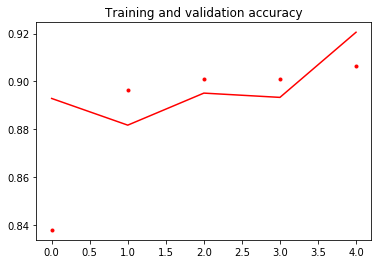

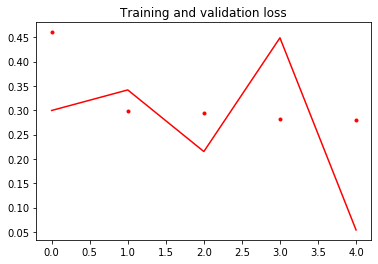

In [32]:
def plot_model_training(training_history):
  accuracy = training_history.history['accuracy']
  val_acc = training_history.history['val_accuracy']
  loss = training_history.history['loss']
  val_loss = training_history.history['val_loss']
  epochs = range(len(accuracy))
  
  plt.plot(epochs, accuracy, 'r.')
  plt.plot(epochs, val_acc, 'r')
  plt.title('Training and validation accuracy')
  
  plt.figure()
  plt.plot(epochs, loss, 'r.')
  plt.plot(epochs, val_loss, 'r-')
  plt.title('Training and validation loss')
  plt.show()

plot_model_training(history)

# Step 7: Predict test results

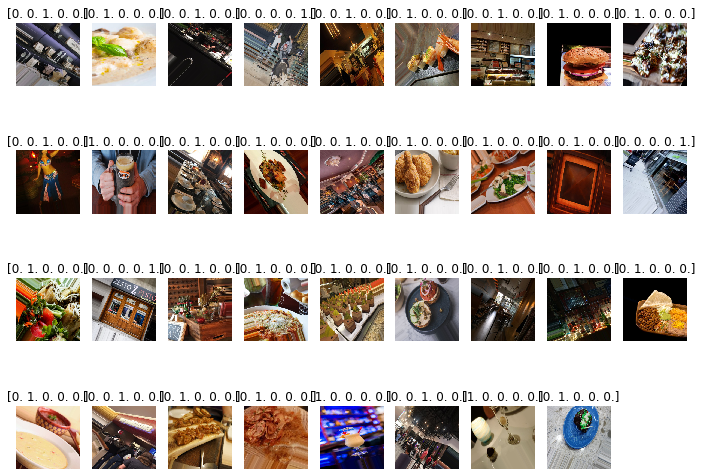

In [52]:
# Check label classes
x_batch, y_batch = next(train_generator)

plt.figure(figsize=(12, 9))
for k, (img, lbl) in enumerate(zip(x_batch, y_batch)):
    plt.subplot(4, 9, k+1)
    plt.title(lbl)
    plt.imshow((img + 1) / 2)
    plt.axis('off')

In [39]:
import matplotlib.gridspec as gridspec
from keras.models import load_model
from keras.preprocessing import image


# Predict results for test images using the custom model
def predict_results(model, img):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    return preds[0]

# Show image classification class probability
def plot_preds(img, preds):
    labels = ("drink", "food", "inside", "menu", "outside")
    gs = gridspec.GridSpec(5, 1, height_ratios=[4, 4, 4, 4, 1])
    plt.figure(figsize=(8,8))
    plt.subplot(gs[0])
    plt.imshow(np.asarray(img))
    plt.subplot(gs[1])
    plt.barh([0, 1, 2, 3, 4], preds, alpha=0.5)
    plt.yticks([0, 1, 2, 3, 4], labels)
    plt.xlabel('Probability')
    plt.xlim(0, 1)
    plt.tight_layout()

In [47]:
# Load the model
model = load_model(MODEL_FILE)

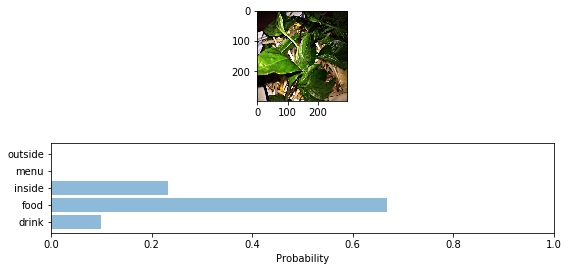

In [45]:
# predict results for test image 1
img1 = image.load_img(TEST_DIR+'/inside/VdWDjAuVK9-ZYSIDraZPQQ.jpg', target_size=(HEIGHT, WIDTH))
preds = predict_results(model, img1)
plot_preds(np.asarray(img1), preds)

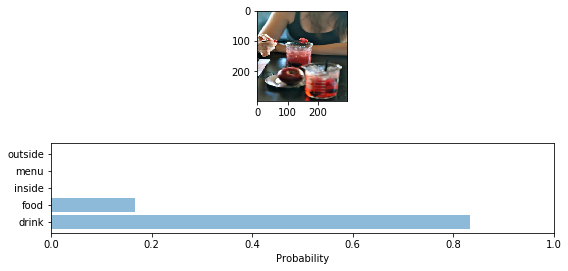

In [48]:
# predict results for test image 2
img2 = image.load_img('photos/test/drink/VXmw-zrK7UDMiYacwOhRRw.jpg', target_size=(HEIGHT, WIDTH))
preds = predict_results(model, img2)
plot_preds(np.asarray(img2), preds)

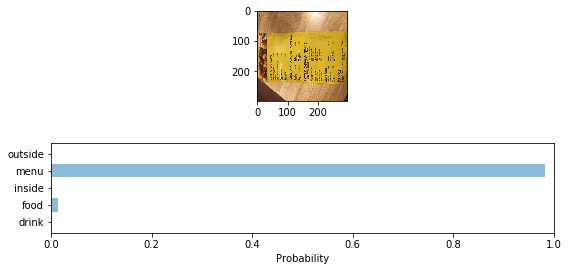

In [49]:
# predict results for test image 3
img3 = image.load_img('photos/test/menu/UWcF7cl2Qj_rzpLVHAk9wA.jpg', target_size=(HEIGHT, WIDTH))
preds = predict_results(model, img3)
plot_preds(np.asarray(img3), preds)

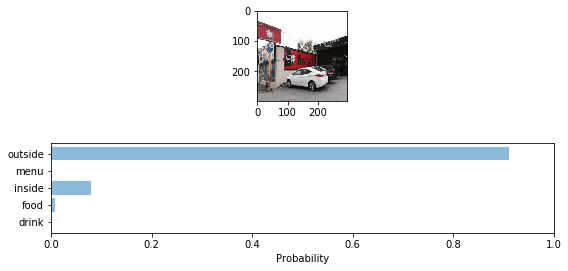

In [53]:
# predict results for test image 4
img4 = image.load_img('photos/test/outside/Qbr5f2AmGH2jSV62ym6rmw.jpg', target_size=(HEIGHT, WIDTH))
preds = predict_results(model, img4)
plot_preds(np.asarray(img4), preds)